# Data Wrangling - Step 2

In [32]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
url ='C:\\Users\\Nader\\Desktop\\Coding Stuff\\Springboard\\Capstone\\Customer Segmentation - Capstone 2\\Customer Segmentation\\Mall_Customers.csv'
df = pd.read_csv(url)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [35]:
df = df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'SpendingScore'})

In [36]:
Gender = df.sort_values('Gender')
Gender

,CustomerID,Gender,Age,Income,SpendingScore
69,70,Female,32,48,47
96,97,Female,47,60,47
160,161,Female,56,79,35
94,95,Female,32,60,42
93,94,Female,40,60,40
...,...,...,...,...,...
81,82,Male,38,54,55
80,81,Male,57,54,51
77,78,Male,40,54,48
138,139,Male,19,74,10


In [37]:
Age = df.sort_values('Age')
Age

,CustomerID,Gender,Age,Income,SpendingScore
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
...,...,...,...,...,...
90,91,Female,68,59,55
108,109,Male,68,63,43
57,58,Male,69,44,46
70,71,Male,70,49,55


In [38]:
Income = df.sort_values('Income')
Income

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
Spending = df.sort_values('SpendingScore')
Spending

,CustomerID,Gender,Age,Income,SpendingScore
156,157,Male,37,78,1
158,159,Male,34,78,1
8,9,Male,64,19,3
32,33,Male,53,33,4
30,31,Male,60,30,4
...,...,...,...,...,...
167,168,Female,33,86,95
145,146,Male,28,77,97
185,186,Male,30,99,97
19,20,Female,35,23,98


# Exploratory Data Analysis - Step 3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df[df['Gender'] == 'Male'].mean()

CustomerID       104.238636
Age               39.806818
Income            62.227273
SpendingScore     48.511364
dtype: float64

In [42]:
df[df['Gender'] == 'Female'].mean()

CustomerID       97.562500
Age              38.098214
Income           59.250000
SpendingScore    51.526786
dtype: float64

<AxesSubplot:ylabel='Gender'>

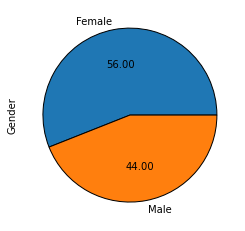

In [43]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

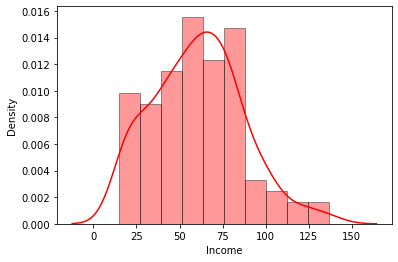

In [44]:
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df.Income, color='red')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

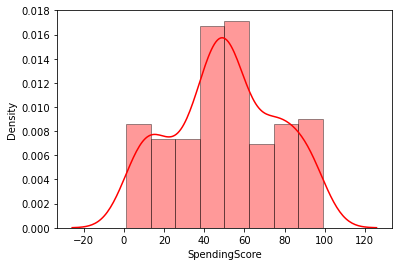

In [45]:
sns.distplot(df.SpendingScore, color='red')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

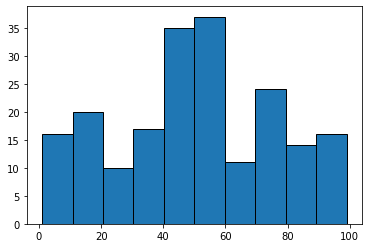

In [46]:
plt.hist(df.SpendingScore)

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

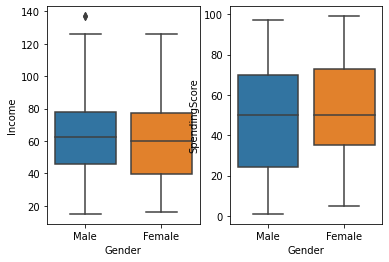

In [48]:
plt.subplot(1,2,1)
sns.boxplot(x=df.Gender, y=df.Income)
plt.subplot(1,2,2)
sns.boxplot(x=df.Gender, y=df.SpendingScore)

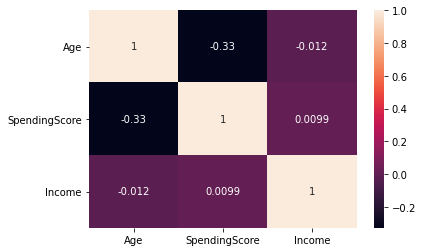

In [49]:
scatter_var = list(set(df.columns)-set(['CustomerID']))
corr_matrix = df[scatter_var].corr()
sns.heatmap(corr_matrix,annot=True);

In [50]:
#EDA_report = ProfileReport(df)
#EDA_report.to_file(output_file='EDA.html')

# Pre-Processing & Training

In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [52]:
x = df.drop(['CustomerID', 'SpendingScore', 'Gender'], axis=1)

In [53]:
y = df[['SpendingScore']]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Modeling -  Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [56]:
pred = regressor.predict(x_test)

In [57]:
import sklearn.metrics as metrics
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

25.0763934368571


# KNN - Regressor - One Hot Encoding

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
#Root mean squared - lower equals better - if it is 2, on average your predictions is +-2, The lower one out of linear and KNN will be the winner
#then implelments gridsearchCV is further enhance for hyperparameters score, (feature importance afterwards - tells you whch predictors came out important to create a story)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [62]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 28.507542861495445
RMSE value for k=  2 is: 24.63980519403512
RMSE value for k=  3 is: 23.216852116990843
RMSE value for k=  4 is: 21.542690175556068
RMSE value for k=  5 is: 21.370727643203917
RMSE value for k=  6 is: 20.526378692361256
RMSE value for k=  7 is: 20.451745097937742
RMSE value for k=  8 is: 20.767921477605793
RMSE value for k=  9 is: 20.41019474142067
RMSE value for k=  10 is: 20.553213860610708
RMSE value for k=  11 is: 21.283614152792723
RMSE value for k=  12 is: 21.382794225472235
RMSE value for k=  13 is: 21.374801289778457
RMSE value for k=  14 is: 21.64805218178546
RMSE value for k=  15 is: 21.530736685543815
RMSE value for k=  16 is: 21.787376290526584
RMSE value for k=  17 is: 22.028341291826855
RMSE value for k=  18 is: 22.04006312867659
RMSE value for k=  19 is: 22.253865175188263
RMSE value for k=  20 is: 22.496276358544318


# K-Means Clustering

Text(0, 0.5, 'WC')

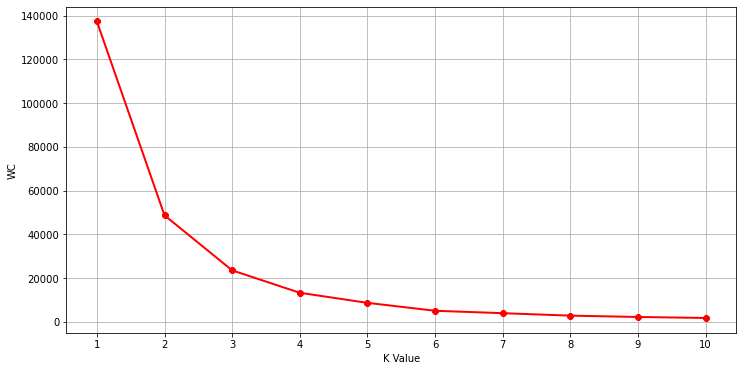

In [78]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker ='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WC')
                    
# Elbow comes in at 5, therefore the optimal K-value is found to be 5

In [65]:
from pandas import DataFrame
df = DataFrame(df,columns=['SpendingScore','Income'])

[[49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [20.91304348 26.30434783]
 [79.36363636 25.72727273]
 [17.11428571 88.2       ]]


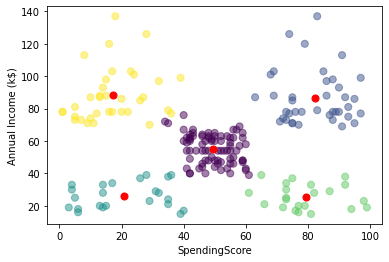

In [66]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['SpendingScore'], df['Income'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("SpendingScore")
plt.ylabel("Annual Income (k$)")
plt.show()

In [67]:
# split into 5 clusters with the following categories
# 1) Low Spending Score, Low Income
# 2) Low Spending Score, High Income
# 3) Average Spending Score, Average Income
# 4) High Spending Score, Low Income
# 5) High Spending Score, High Income

# Gaussian Mixture

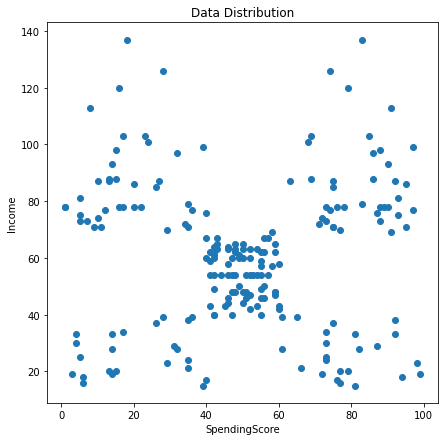

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(df["SpendingScore"],df["Income"])
plt.xlabel('SpendingScore')
plt.ylabel('Income')
plt.title('Data Distribution')
plt.show()

In [69]:
from pandas import DataFrame
from sklearn.mixture import GaussianMixture
df = DataFrame(df,columns=['SpendingScore','Income'])

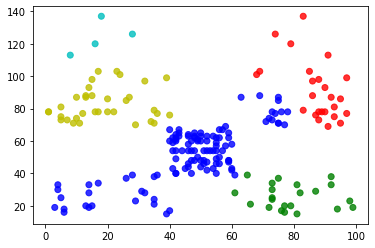

In [70]:
gmm = GaussianMixture(n_components=5, random_state=6)
gmm.fit(df)

colors = ['r' if i==0 else 'b' if i==1 else 'g' if i==2 else 'c' if i ==3 else 'y' for i in gmm.predict(df)]
ax = plt.gca()
ax.scatter(df['SpendingScore'], df['Income'], c=colors, alpha=0.8)
plt.show()

# GRIDSEARCH

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [72]:
# Select an algorithm
algorithm = KNeighborsRegressor()

In [73]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9], 'weights': ['uniform','distance']}]

In [74]:
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [75]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.18360082196297992
KNeighborsRegressor(n_neighbors=6)
{'n_neighbors': 6, 'weights': 'uniform'}


# Feature Importance

In [76]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

clf = KNeighborsRegressor()

# x is the features
# y is the target variable

n_feats = x.shape[1]

print('Feature  Accuracy')
for i in range(n_feats):
    scores = cross_val_score(clf, x, y, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Accuracy
0        -0.0082958
1        -0.0082958


In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(x_train)
	# transform test input data
	X_test_fs = fs.transform(x_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 13.190521
Feature 1: 0.236003


C:\Users\Nader\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
# This is telling us that Age has the biggest impact on our target variable spending score